In [3]:
!pip uninstall tensorflow -y
!pip uninstall keras -y

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0
Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Successfully uninstalled keras-2.13.1


In [4]:
!pip cache purge
!pip install tensorflow==2.13.0
!pip install opencv-python matplotlib scikit-learn numpy

Files removed: 18 (2.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [tensorflow]


Loading and preprocessing data...
Loading the dataset...
Dataset shape: (409, 2)
Sample data[0] type: <class 'numpy.ndarray'>
Sample data[0][0] shape: (333, 650, 3)
Sample data[0][1] type: <class 'list'>
Sample data[0][1] length: 2
Sample data[0][1][0] type: <class 'dict'>
Sample data[0][1][0] keys: ['label', 'notes', 'points', 'imageWidth', 'imageHeight']
Sample data[0][1][0] content: {'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}
Sample data[0][1][1] type: <class 'dict'>
Sample data[0][1][1] keys: ['label', 'notes', 'points', 'imageWidth', 'imageHeight']
Sample data[0][1][1] content: {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}
Starting processing...
Processing sample 0/409
Sample 0: image shape = (333,

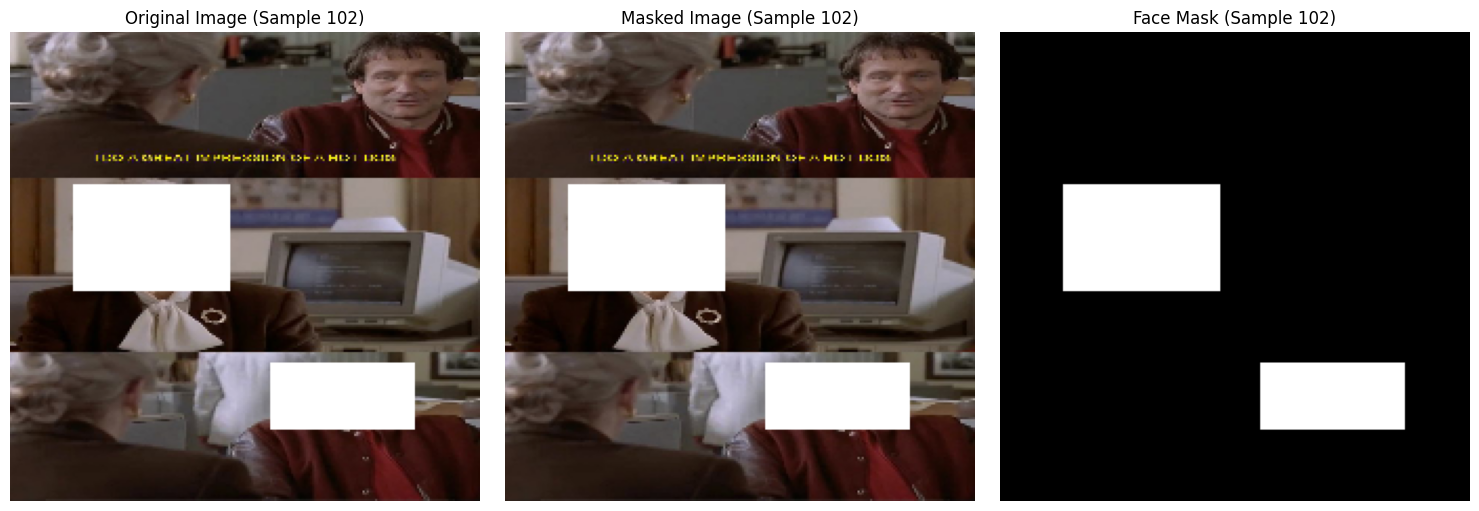


Building and training model...
Attempting to load MobileNetV2 with ImageNet weights...
Successfully created U-Net with MobileNetV2 backbone.
Model architecture:
Model: "UNet_MobileNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                      


Training model...


Epoch 1/50
31/31 [==============================] - 32s 971ms/step - loss: 1.2649 - dice_coefficient: 0.2982 - binary_accuracy: 0.7090 - val_loss: 1.3460 - val_dice_coefficient: 0.2190 - val_binary_accuracy: 0.7996 - lr: 1.0000e-04
Epoch 2/50
31/31 [==============================] - 34s 1s/step - loss: 0.8497 - dice_coefficient: 0.4711 - binary_accuracy: 0.9452 - val_loss: 1.1484 - val_dice_coefficient: 0.3348 - val_binary_accuracy: 0.9147 - lr: 1.0000e-04
Epoch 3/50
31/31 [==============================] - 29s 938ms/step - loss: 0.6364 - dice_coefficient: 0.5730 - binary_accuracy: 0.9846 - val_loss: 0.9823 - val_dice_coefficient: 0.4028 - val_binary_accuracy: 0.9777 - lr: 1.0000e-04
Epoch 4/50
31/31 [==============================] - 31s 992ms/step - loss: 0.5319 - dice_coefficient: 0.6262 - binary_accuracy: 0.9913 - val_loss: 0.7957 - val_dice_coefficient: 0.4832 - val_binary_accuracy: 0.9928 - lr: 1.0000e-04
Epoch 5/50
31/31 [==============================] - 32s 1s/step - loss: 0.4

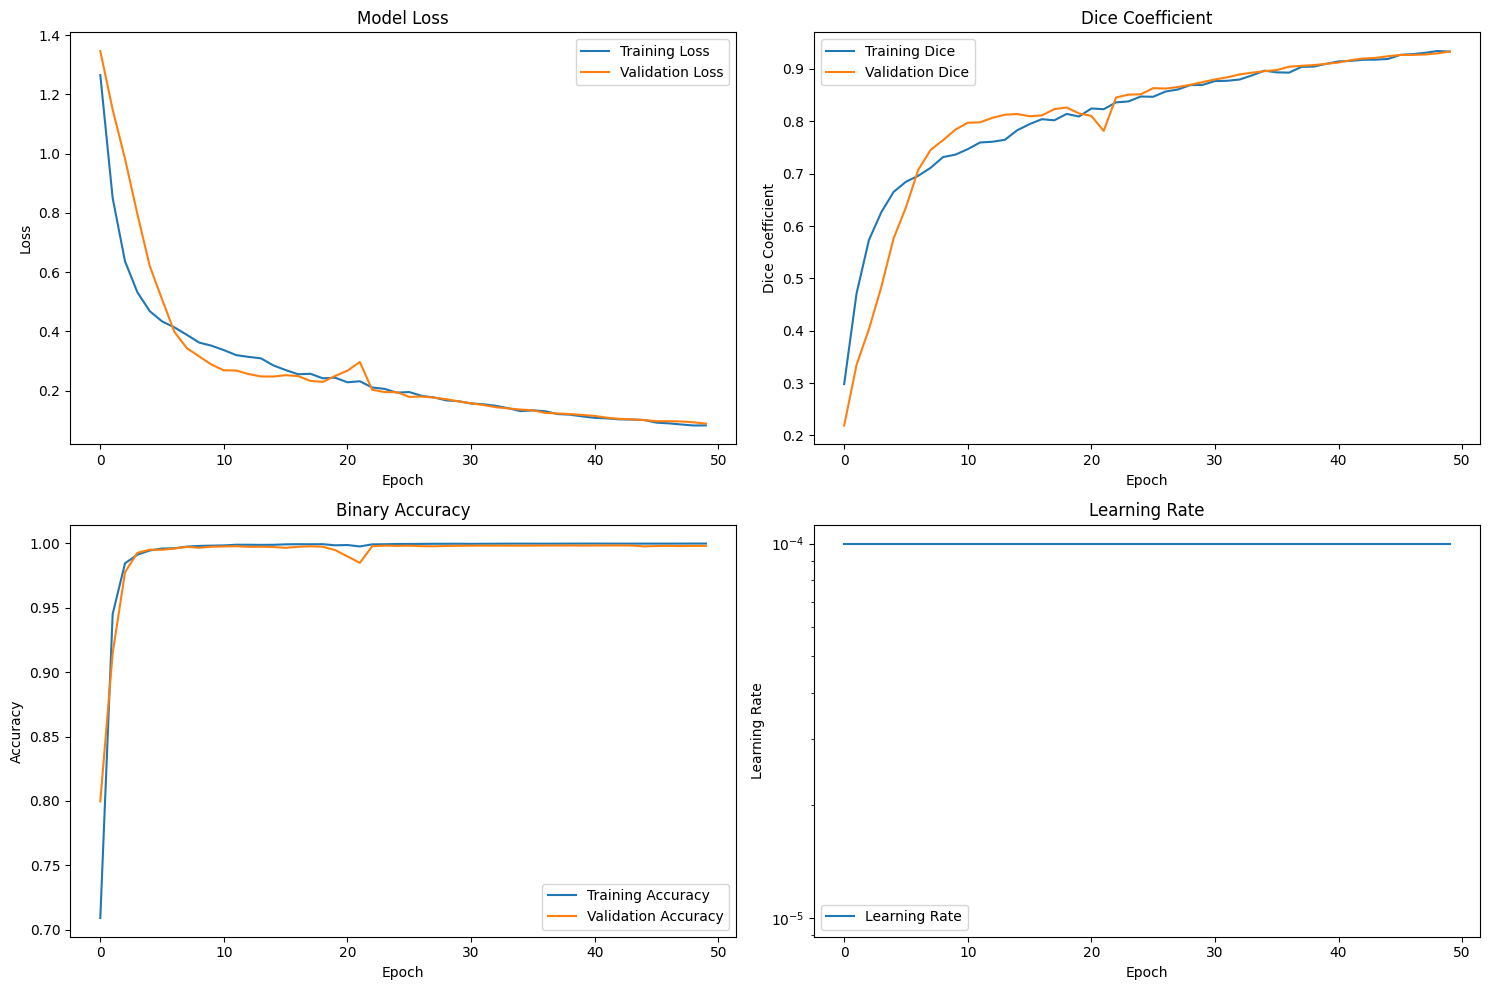


Evaluating model...
Evaluating model on test set...
Test Loss: 0.0830
Test Dice Coefficient: 0.9370
Test Binary Accuracy: 0.9979
3/3 [==============================] - 4s 1s/step

Model Performance Summary:
- Test Dice Coefficient: 0.9370
- Test Binary Accuracy: 0.9979

Testing on image at index 22...


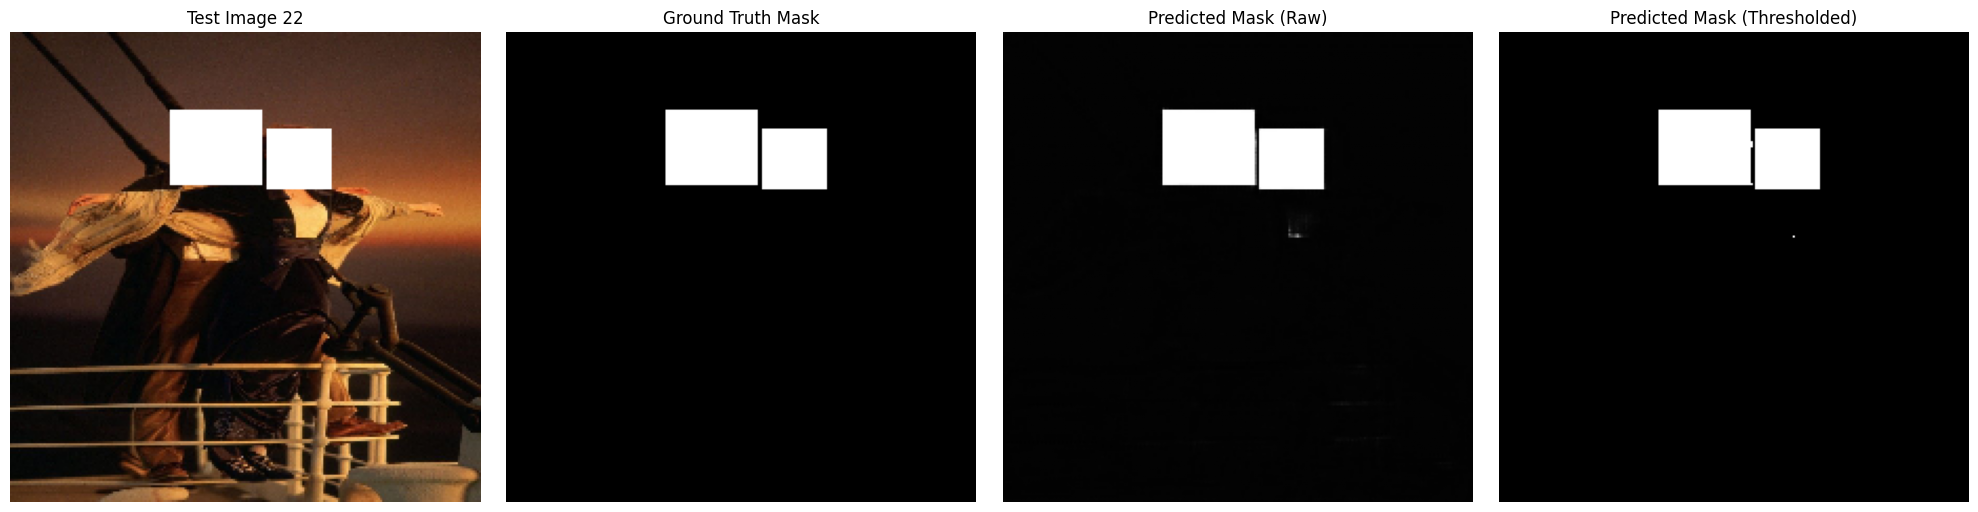

Dice coefficient for test image 22: 0.8611


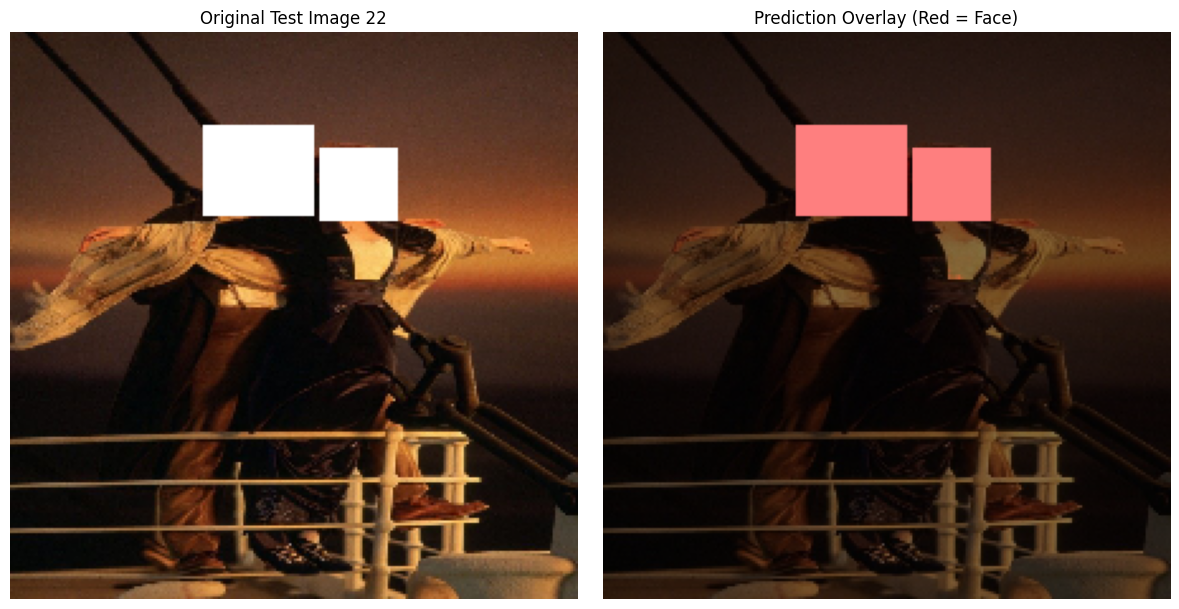


Final Results:
- Overall Test Dice Coefficient: 0.9370
- Test Image 22 Dice Coefficient: 0.8611
- Model successfully detects face regions.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras import backend as K
import random
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
def load_and_preprocess_data(file_path='images.npy'):
    print("Loading the dataset...")
    data = np.load(file_path, allow_pickle=True)
    print(f"Dataset shape: {data.shape}")
    print(f"Sample data[0] type: {type(data[0])}")
    print(f"Sample data[0][0] shape: {data[0][0].shape}")
    print(f"Sample data[0][1] type: {type(data[0][1])}")
    if isinstance(data[0][1], list):
        print(f"Sample data[0][1] length: {len(data[0][1])}")
        if len(data[0][1]) > 0:
            print(f"Sample data[0][1][0] type: {type(data[0][1][0])}")
            if isinstance(data[0][1][0], dict):
                print(f"Sample data[0][1][0] keys: {list(data[0][1][0].keys())}")
                print(f"Sample data[0][1][0] content: {data[0][1][0]}")
            if len(data[0][1]) > 1:
                print(f"Sample data[0][1][1] type: {type(data[0][1][1])}")
                if isinstance(data[0][1][1], dict):
                    print(f"Sample data[0][1][1] keys: {list(data[0][1][1].keys())}")
                    print(f"Sample data[0][1][1] content: {data[0][1][1]}")
    else:
        print(f"Sample data[0][1] shape: {data[0][1].shape}")
    return data
def create_features_and_labels(data, target_size=(224, 224)):
    X = [] 
    Y = []  
    print("Starting processing...")
    for i, sample in enumerate(data):
        if i % 100 == 0:
            print(f"Processing sample {i}/{len(data)}")
        try:
            image = sample[0] 
            mask_data = sample[1]   
            if i < 5:
                print(f"Sample {i}: image shape = {image.shape}, dtype = {image.dtype}")
            if len(image.shape) == 2:
                image = np.expand_dims(image, axis=-1)
            if image.shape[-1] == 1:
                image = np.repeat(image, 3, axis=-1)            
            h_orig, w_orig = image.shape[:2]
            mask = np.zeros((h_orig, w_orig), dtype=np.uint8)
            if isinstance(mask_data, list):
                for face_annotation in mask_data:
                    if isinstance(face_annotation, dict) and 'points' in face_annotation:
                        points = face_annotation['points']                        
                        if len(points) == 2:
                            try:
                                x1_norm, y1_norm = points[0]['x'], points[0]['y']
                                x2_norm, y2_norm = points[1]['x'], points[1]['y']
                                x1 = int(x1_norm * w_orig)
                                y1 = int(y1_norm * h_orig)
                                x2 = int(x2_norm * w_orig)
                                y2 = int(y2_norm * h_orig)
                                x_min = max(0, min(x1, x2))
                                y_min = max(0, min(y1, y2))
                                x_max = min(w_orig, max(x1, x2))
                                y_max = min(h_orig, max(y1, y2))
                                if x_max > x_min and y_max > y_min:
                                    mask[y_min:y_max, x_min:x_max] = 1
                                if i < 5:  
                                    print(f"Sample {i}: bbox ({x_min}, {y_min}) to ({x_max}, {y_max})")
                            except (KeyError, TypeError, ValueError) as e:
                                if i < 5:
                                    print(f"Error processing points for sample {i}: {e}")
                                continue
            if np.sum(mask) == 0:
                if i < 5:
                    print(f"Warning: No valid mask for sample {i}, creating default mask.")
                center_x, center_y = w_orig // 2, h_orig // 2
                mask_size = min(h_orig, w_orig) // 8
                y1 = max(0, center_y - mask_size)
                y2 = min(h_orig, center_y + mask_size)
                x1 = max(0, center_x - mask_size)
                x2 = min(w_orig, center_x + mask_size)
                mask[y1:y2, x1:x2] = 1
            image_resized = cv2.resize(image, target_size)
            mask_resized = cv2.resize(mask, target_size)
            if len(image_resized.shape) == 2:
                image_resized = np.expand_dims(image_resized, axis=-1)
            if image_resized.shape[-1] == 1:
                image_resized = np.repeat(image_resized, 3, axis=-1)
            elif image_resized.shape[-1] != 3:
                image_resized = image_resized[:, :, :3]
            image_normalized = image_resized.astype(np.float32) / 255.0
            binary_mask = (mask_resized > 0.5).astype(np.float32)
            masked_image = image_normalized.copy()
            masked_image[binary_mask == 1] = 1.0
            if masked_image.shape != (target_size[0], target_size[1], 3):
                print(f"Warning: masked_image shape {masked_image.shape} for sample {i}")
                continue
            if binary_mask.shape != target_size:
                print(f"Warning: binary_mask shape {binary_mask.shape} for sample {i}")
                continue
            X.append(masked_image)
            Y.append(binary_mask)
        except Exception as e:
            print(f"Error processing sample {i}: {e}")
            continue
    print(f"Successfully processed {len(X)} samples out of {len(data)}")    
    try:
        X = np.array(X, dtype=np.float32)
        Y = np.array(Y, dtype=np.float32)
        if len(Y.shape) == 3:
            Y = np.expand_dims(Y, axis=-1)
        print(f"Final X shape: {X.shape}")
        print(f"Final Y shape: {Y.shape}")
        return X, Y        
    except ValueError as e:
        print(f"Error creating numpy arrays: {e}")
        print("Checking shapes of all X elements:")
        for i, x in enumerate(X[:10]):  
            print(f"X[{i}] shape: {x.shape}")
        print("Checking shapes of all Y elements:")
        for i, y in enumerate(Y[:10]):  
            print(f"Y[{i}] shape: {y.shape}")
        raise
def split_data(X, Y, test_size=0.2, val_size=0.2):
    X_temp, X_test, Y_temp, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=42, stratify=None
    )
    val_size_adjusted = val_size / (1 - test_size)
    X_train, X_val, Y_train, Y_val = train_test_split(
        X_temp, Y_temp, test_size=val_size_adjusted, random_state=42
    )   
    print(f"Train set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    return X_train, X_val, X_test, Y_train, Y_val, Y_test
def visualize_sample(X, Y, index=None):
    if index is None:
        index = np.random.randint(0, len(X))
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    original_image = X[index].copy()
    mask = Y[index]
    original_reconstructed = original_image.copy()
    axes[0].imshow(original_reconstructed)
    axes[0].set_title(f'Original Image (Sample {index})')
    axes[0].axis('off') 
    axes[1].imshow(X[index])
    axes[1].set_title(f'Masked Image (Sample {index})')
    axes[1].axis('off')
    axes[2].imshow(mask, cmap='gray')
    axes[2].set_title(f'Face Mask (Sample {index})')
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()
    return index
def create_simple_unet_model(input_shape=(224, 224, 3)):
    inputs = keras.Input(shape=input_shape)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D((2, 2))(conv4)
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)
    up6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
    up7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)
    up8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)
    up9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    model = keras.Model(inputs=[inputs], outputs=[outputs], name='Simple_UNet')
    return model
def create_unet_mobilenet_model_fixed(input_shape=(224, 224, 3)):
    try:
        print("Attempting to load MobileNetV2 with ImageNet weights...")
        base_model = MobileNetV2(
            input_shape=input_shape,
            include_top=False,
            weights='imagenet'
        )
        base_model.trainable = False        
        layer_names = [
            'block_1_expand_relu',   
            'block_3_expand_relu',   
            'block_6_expand_relu',  
            'block_13_expand_relu',  
            'block_16_project',      
        ]
        layers_dict = {layer.name: layer.output for layer in base_model.layers}
        skip_connections = [layers_dict[name] for name in layer_names]
        inputs = base_model.input
        x = base_model.output
        x = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Concatenate()([x, skip_connections[3]])  
        x = layers.Conv2D(512, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Concatenate()([x, skip_connections[2]]) 
        x = layers.Conv2D(256, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Concatenate()([x, skip_connections[1]]) 
        x = layers.Conv2D(128, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Concatenate()([x, skip_connections[0]]) 
        x = layers.Conv2D(64, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(32, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)
        model = keras.Model(inputs, outputs, name='UNet_MobileNet')
        print("Successfully created U-Net with MobileNetV2 backbone.")
        return model   
    except Exception as e:
        print(f"Failed to load MobileNetV2: {e}")
        print("Falling back to simple U-Net architecture...")
        return create_simple_unet_model(input_shape)
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)
def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return bce + dice
def train_model(model, X_train, Y_train, X_val, Y_val, epochs=50, batch_size=8):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss=combined_loss,
        metrics=[dice_coefficient, 'binary_accuracy']
    )
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_dice_coefficient',
            patience=10,
            restore_best_weights=True,
            mode='max'
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-7
        )
    ]
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_val, Y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )
    return history
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Model Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 1].plot(history.history['dice_coefficient'], label='Training Dice')
    axes[0, 1].plot(history.history['val_dice_coefficient'], label='Validation Dice')
    axes[0, 1].set_title('Dice Coefficient')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Dice Coefficient')
    axes[0, 1].legend()
    axes[1, 0].plot(history.history['binary_accuracy'], label='Training Accuracy')
    axes[1, 0].plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
    axes[1, 0].set_title('Binary Accuracy')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].legend()
    if 'lr' in history.history:
        axes[1, 1].plot(history.history['lr'], label='Learning Rate')
        axes[1, 1].set_title('Learning Rate')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Learning Rate')
        axes[1, 1].set_yscale('log')
        axes[1, 1].legend()
    else:
        axes[1, 1].axis('off')
    plt.tight_layout()
    plt.show()
def evaluate_model(model, X_test, Y_test):
    print("Evaluating model on test set...")
    test_loss, test_dice, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Dice Coefficient: {test_dice:.4f}")
    print(f"Test Binary Accuracy: {test_accuracy:.4f}")
    predictions = model.predict(X_test)
    return predictions, test_dice, test_accuracy
def visualize_predictions(X_test, Y_test, predictions, index=22):
    if index >= len(X_test):
        print(f"Index {index} is out of range. Using index 0 instead.")
        index = 0
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(X_test[index])
    axes[0].set_title(f'Test Image {index}')
    axes[0].axis('off')
    axes[1].imshow(Y_test[index].squeeze(), cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    axes[1].axis('off')
    axes[2].imshow(predictions[index].squeeze(), cmap='gray')
    axes[2].set_title('Predicted Mask (Raw)')
    axes[2].axis('off')
    pred_binary = (predictions[index].squeeze() > 0.5).astype(np.float32)
    axes[3].imshow(pred_binary, cmap='gray')
    axes[3].set_title('Predicted Mask (Thresholded)')
    axes[3].axis('off')
    plt.tight_layout()
    plt.show()
    y_true = Y_test[index].flatten()
    y_pred = predictions[index].flatten()
    y_pred_binary = (y_pred > 0.5).astype(np.float32)
    dice_score = dice_coefficient(
        tf.constant(y_true), 
        tf.constant(y_pred)
    ).numpy()
    print(f"Dice coefficient for test image {index}: {dice_score:.4f}")
    return dice_score
def overlay_prediction_on_image(X_test, predictions, index=22, alpha=0.5):
    if index >= len(X_test):
        print(f"Index {index} is out of range. Using index 0 instead.")
        index = 0
    test_image = X_test[index]
    prediction = predictions[index].squeeze()
    colored_mask = np.zeros_like(test_image)
    colored_mask[:, :, 0] = prediction 
    overlayed = test_image * (1 - alpha) + colored_mask * alpha
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(test_image)
    axes[0].set_title(f'Original Test Image {index}')
    axes[0].axis('off')
    axes[1].imshow(overlayed)
    axes[1].set_title(f'Prediction Overlay (Red = Face)')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
def main():
    print("Loading and preprocessing data...")
    try:
        data = load_and_preprocess_data('images.npy')
        X, Y = create_features_and_labels(data)
        print(f"Features (X) shape: {X.shape}")
        print(f"Labels (Y) shape: {Y.shape}")
        X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X, Y)
        print("\nVisualizing a random training sample...")
        sample_idx = visualize_sample(X_train, Y_train)
    except FileNotFoundError:
        print("Error: 'images.npy' file not found.")
        print("Please ensure the dataset file is in the current directory.")
        return
    print("\nBuilding and training model...")
    model = create_unet_mobilenet_model_fixed(input_shape=(224, 224, 3))
    print("Model architecture:")
    model.summary()
    print("\nTraining model...")
    history = train_model(model, X_train, Y_train, X_val, Y_val, epochs=50)
    plot_training_history(history)
    print("\nEvaluating model...")
    predictions, test_dice, test_accuracy = evaluate_model(model, X_test, Y_test)
    print(f"\nModel Performance Summary:")
    print(f"- Test Dice Coefficient: {test_dice:.4f}")
    print(f"- Test Binary Accuracy: {test_accuracy:.4f}")
    print(f"\nTesting on image at index 22...")
    dice_score = visualize_predictions(X_test, Y_test, predictions, index=22)
    overlay_prediction_on_image(X_test, predictions, index=22)
    print(f"\nFinal Results:")
    print(f"- Overall Test Dice Coefficient: {test_dice:.4f}")
    print(f"- Test Image 22 Dice Coefficient: {dice_score:.4f}")
    print(f"- Model successfully detects face regions.")
    return model, history, predictions
model, history, predictions = main()